In [78]:
import os,sys
sys.path.append('/home/zkd/文档/ION/Desktop/241209_393锁定/code')
from Photon_infere import *

In [79]:
# os.chdir(r'/mnt/webdav1/2.3_DI-QKD/0.0_Charlie/raw_data')
os.chdir(r'/home/zkd/文档/ION/Desktop/241209_393锁定/20250302')

In [80]:
fold=os.listdir()
for i,_ in enumerate(fold):
    print(i,_)

0 0.311
1 sys.json
2 0.437
3 0.0842
4 gamma_res_time.csv
5 0.66
6 0.22
7 gamma_fit_ref.jpeg
8 0.584
9 0.584_1
10 gamma_fit.jpeg
11 gamma_res_time_t_4ns.csv
12 0.47


## Gamma Distribution

In [94]:
sys_json=read_sys_json('sys.json')

# 荧光计数窗口
window_start=sys_json['window_start(ps)']
window_end=sys_json['window_end(ps)']
# 分析数据截至时间
period=sys_json['period(s)']
time_start=sys_json['time_start(s)']
time_stop=sys_json['time_stop(s)']
#脉冲
pulse_num=sys_json['pulse_num']
pulse_interval=sys_json['pulse_interval(ps)'] 

# turn=sys_json['turns'][3]

# 移动窗口
window_start_list=np.array(sys_json['window_start_list(ns)'])*1e3 #ps
window_len=sys_json['window_len(ns)']*1e3 #ps
folds=sys_json['turns']
out_csv='gamma_res_time_t_{:.0f}ns.csv'.format(window_len/1e3)
print('outfile name: ',out_csv)

comment : This is a json file for TDC count.
blcok0 : count windows info
window_start(ps) : 433,500.0
window_end(ps) : 443,500.0
block1 : recquire time info
period(s) : 0.0005
time_start(s) : 0
time_stop(s) : 600000
block2 : pulse info
pulse_num : 9
pulse_interval(ps) : 5,000,000.0
block3 : turn / phase info
turns : ['0.47', '0.66', '0.311', '0.584_1', '0.0842']
block4 : windwo move info
window_start_list(ns) : [433.5, 435.5, 437.5, 439.5, 441.5, 443.5, 445.5, 447.5, 449.5]
window_len(ns) : 4
block5 : monitor pulse info
monitor_start(ps) : 45430500
monitor_end(ps) : 45431500
block6 : outer count info
threshold : 1
inner_loop : 100
outfile name:  gamma_res_time_t_4ns.csv


In [95]:
for turn in folds:
    # 分析数据截至时间
    for window_start in window_start_list:
        window_end=window_start+window_len

        pmt1_df=read_id900_binary(turn,3)
        pmt2_df=read_id900_binary(turn,4)
        ## 时间限制
        pmt1_df=pmt1_df[(pmt1_df['time_satmp']>=time_start/period)&(pmt1_df['time_satmp']<=time_stop/period)].copy()
        pmt2_df=pmt2_df[(pmt2_df['time_satmp']>=time_start/period)&(pmt2_df['time_satmp']<=time_stop/period)].copy()
        ## 计算时间窗内光子数
        pmt1_index=window_index(pmt1_df,window_start,window_end,pulse_num=pulse_num,pulse_interval=pulse_interval)
        pmt2_index=window_index(pmt2_df,window_start,window_end,pulse_num=pulse_num,pulse_interval=pulse_interval)
        pmt1_count=pmt1_df[pmt1_index]['start_index'].value_counts().sort_index(ascending=True)
        pmt2_count=pmt2_df[pmt2_index]['start_index'].value_counts().sort_index(ascending=True)
        PMT1_SUM=pmt1_count.sum()
        PMT2_SUM=pmt2_count.sum()
        print('pmt1:{}, pmt2:{}'.format(PMT1_SUM,PMT2_SUM))
        ## 写入文件
        try:
            with open(out_csv, 'r') as f:
                pass
        except FileNotFoundError:
            # 文件不存在，写入标题
            with open(out_csv, 'w') as f:
                f.write('turn,state,start(ps),end(ps),pmt1,pmt2\n')

        with open(out_csv,'a') as f:
            f.write('{a},origin,{t0:.0f},{t1:.0f},{pmt1:.0f},{pmt2:.0f}\n'.format(a=turn.split('_')[0],t0=window_start,t1=window_end,pmt1=PMT1_SUM,pmt2=PMT2_SUM))



pmt1:93, pmt2:125
pmt1:66, pmt2:96
pmt1:57, pmt2:74
pmt1:41, pmt2:58
pmt1:33, pmt2:51
pmt1:25, pmt2:39
pmt1:15, pmt2:23
pmt1:14, pmt2:19
pmt1:15, pmt2:20
pmt1:51, pmt2:183
pmt1:39, pmt2:145
pmt1:31, pmt2:122
pmt1:24, pmt2:95
pmt1:20, pmt2:64
pmt1:13, pmt2:38
pmt1:13, pmt2:22
pmt1:15, pmt2:16
pmt1:10, pmt2:13
pmt1:209, pmt2:26
pmt1:152, pmt2:17
pmt1:108, pmt2:15
pmt1:95, pmt2:15
pmt1:75, pmt2:12
pmt1:56, pmt2:10
pmt1:36, pmt2:9
pmt1:24, pmt2:8
pmt1:30, pmt2:5
pmt1:26, pmt2:195
pmt1:15, pmt2:156
pmt1:13, pmt2:115
pmt1:12, pmt2:91
pmt1:10, pmt2:79
pmt1:6, pmt2:59
pmt1:5, pmt2:40
pmt1:6, pmt2:31
pmt1:4, pmt2:23
pmt1:34, pmt2:155
pmt1:20, pmt2:116
pmt1:13, pmt2:106
pmt1:10, pmt2:102
pmt1:12, pmt2:72
pmt1:14, pmt2:48
pmt1:7, pmt2:43
pmt1:1, pmt2:36
pmt1:2, pmt2:27


## Get Gamma & window

In [96]:
# out_csv='gamma_res_time_t.csv'
res_data=pd.read_csv(out_csv)
count2gamma(res_data)
res_data.sort_values(by='turn',inplace=True)
origin_df=res_data[res_data['state']=='origin']
choice_df=res_data[res_data['state']=='select']
origin_df['phase'].unique()

array([ 60.624, 223.92 , 338.4  , 420.48 , 475.2  ])

window len :442ns | Fitted parameters: gamma=0.751±0.044, phase_offset=3.679±0.099, count_offset=3.679±0.099, R²=98.976%
window len :444ns | Fitted parameters: gamma=0.725±0.086, phase_offset=3.712±0.202, count_offset=3.712±0.202, R²=96.005%
window len :446ns | Fitted parameters: gamma=0.686±0.042, phase_offset=3.833±0.107, count_offset=3.833±0.107, R²=98.803%
window len :448ns | Fitted parameters: gamma=0.784±0.197, phase_offset=3.868±0.412, count_offset=3.868±0.412, R²=79.432%
window len :434ns | Fitted parameters: gamma=0.780±0.063, phase_offset=3.601±0.136, count_offset=3.601±0.136, R²=97.814%
window len :436ns | Fitted parameters: gamma=0.816±0.056, phase_offset=3.629±0.122, count_offset=3.629±0.122, R²=98.329%
window len :438ns | Fitted parameters: gamma=0.802±0.039, phase_offset=3.570±0.076, count_offset=3.570±0.076, R²=99.352%
window len :450ns | Fitted parameters: gamma=0.771±0.084, phase_offset=3.817±0.204, count_offset=3.817±0.204, R²=95.233%
window len :440ns | Fitted param

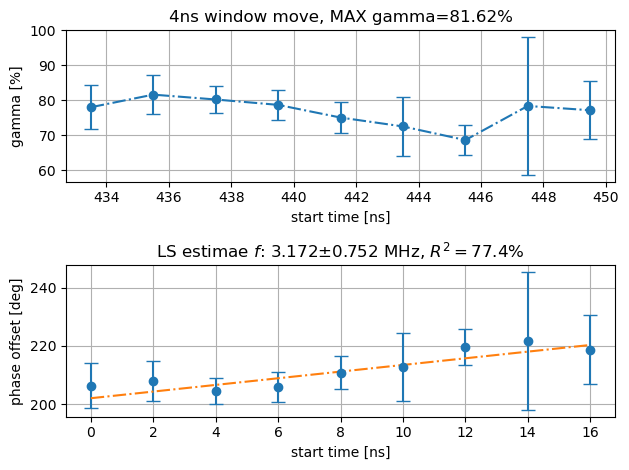

In [98]:
origin_df['delta']=origin_df['end(ps)']-origin_df['start(ps)']
out_dict={'t0':[],'gamma':[],'gamma_err':[],'phase_offset':[],'phase_offset_err':[],'pmt1':[],'pmt2':[]}
for start_t in origin_df['start(ps)'].unique():
    df00=origin_df[origin_df['start(ps)']==start_t]
    delta_t=df00['start(ps)'].values[0]/1000
    print('window len :{:.0f}ns'.format(delta_t),end=' | ')
    param,param_err=estimate_gamma(df00,model_func=model_func_count_offset)
    # plt.savefig('gamma_fit_{}.png'.format(delta_t))
    plt.close()
    out_dict['t0'].append(df00['start(ps)'].values[0])
    out_dict['gamma'].append(param[0])
    out_dict['gamma_err'].append(param_err[0])
    out_dict['phase_offset'].append(param[1])
    out_dict['phase_offset_err'].append(param_err[1])
    out_dict['pmt1'].append(df00['pmt1'].sum())
    out_dict['pmt2'].append(df00['pmt2'].sum())

out_dict=pd.DataFrame(data=out_dict)
out_dict['gamma']=np.abs(out_dict['gamma'])
out_dict.sort_values(by='t0',inplace=True)
title_txt='{:.0f}ns window move, MAX gamma={:.2%}'.format(window_len*1e-3,np.max(out_dict['gamma']))
plt.subplot(211)
plt.errorbar(out_dict['t0']/1000,out_dict['gamma']*100,yerr=out_dict['gamma_err']*100,fmt='-.o',label='experimental data',capsize=5)
plt.xlabel('start time [ns]')
plt.ylabel('gamma [%]')
plt.title(title_txt)
plt.grid()
plt.subplot(212)

start_list=(out_dict['t0'].values-out_dict['t0'].values[0])/1000
phase=out_dict['phase_offset'].values
phase=np.unwrap(phase)
liner=lambda x, a, b: 2*np.pi*a*x+b
if np.isinf(phase).any():
    param,covariance=curve_fit(liner, start_list, phase)
else:
    param,covariance=curve_fit(liner, start_list, phase,sigma=out_dict['phase_offset_err'])
est_phase=liner(start_list, *param)
r_squared=1-np.sum((est_phase-phase)**2)/np.sum((phase-np.mean(phase))**2)
plt.errorbar(start_list,phase*180/np.pi,yerr=out_dict['phase_offset_err']*180/np.pi,fmt='o',label='experimental data',capsize=5)
plt.plot(start_list,est_phase*180/np.pi,'-.',label='fit {:.1%}±{:.1%}'.format(np.abs(param[0]),np.sqrt(np.diag(covariance))[0]))
plt.xlabel('start time [ns]')
plt.ylabel('phase offset [deg]')
plt.title('LS estimae $f$: {:.3f}±{:.3f} MHz, $R^2=${:.1%}'.format(np.abs(param[0])*1e3,np.sqrt(np.diag(covariance))[0]*1e3,r_squared))
plt.grid()
plt.tight_layout()
plt.savefig('df_{:.0f}ns_window_fit.jpeg'.format(window_len*1e-3),dpi=300)
plt.show()

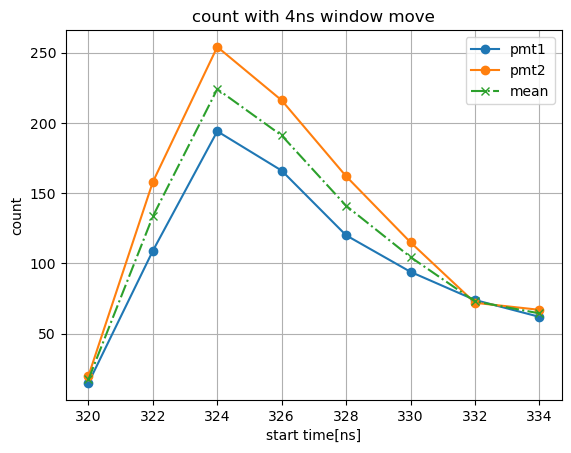

In [ ]:
plt.plot(out_dict['t0']*1e-3,out_dict['pmt1'],'-o',label='pmt1')
plt.plot(out_dict['t0']*1e-3,out_dict['pmt2'],'-o',label='pmt2')
plt.plot(out_dict['t0']*1e-3,(out_dict['pmt1']+out_dict['pmt2'])/2,'-.x',label='mean')
plt.title('count with {:.0f}ns window move'.format(window_len*1e-3))
plt.xlabel('start time[ns]')
plt.ylabel('count')
plt.legend()
plt.grid()
plt.show()